![Urgences - Image CC0 - pexels.com](img/pexels-pixabay-263402.jpg "Urgences")

# Biology Order Prescription
*Levi-Dan Azoulay*  
*Shana Zirah*  
*Nathane Berrebi*  
*Gaspard André*  
*Jona Benhamou*    
*Ali Bellamine*

In [1]:
import pandas as pd
import numpy as np

# Plan du document

Les étapes clés de ce projet sont les suivantes :

- I. Introduction
- II. Téléchargement des données et transformation
- III. Exploration et visualisation les données
- IV. Sélection des variables d'interêts
- V. Définition et entrainement d'une solution d'apprentissage statistique

# I. Introduction

 ## I.1 Contexte

Chaque jour, environ 50 000 personnes se présentent dans un service d'accueil des urgences (SAU) en France. En moyenne, 75% des patients retournent à domicile, et 20% sont hospitalisés. La durée moyenne de présence au SAU est longue. On estime que seulement 20% attendront moins d'une heure, tandis que ~30% attendront entre 1h et 2H et ~30% attendront en 2 et 4H. Enfin, un peu plus de 10% resteront au SAU entre 4 et 6H. Dans un contexte de pénurie de soignants, le recours à la consultation au SAU est en constante augmentation depuis plusieurs années. L'optimisation du circuit des urgences est une problématique centrale. Le cout humain et financier des dysfonctionnements du circuit et de l'offre de soin est important. 

Le parcours classique du circuit des urgences est le suivant :  
1. **Premier contact d'ordre administratif**
2. **Premier contact soignant avec une infirmière d'accueil et d'orientation (IAO) (~M30) avec**  :
    - Recueil du motif de consultation
    - Prise des constantes
    - Recueil de quelques antécédents et de l'ordonnance du patient 
    - Eventuellement ECG  


Le patient est classé selon un score de gravité (bleu, vert, jaune, orange, rouge, ou 1-2-3-4-5)

3. **Premier contact médical avec un médecin (~H1)** :
    - Interrogatoire
    - Examen clinique

    
A la suite de cette consultation, plusieurs cas de figures selon la situation.
Le patient peut sortir avec ou sans ordonnance si le diagnostic est posé par l'examen clinique et ne nécéssite ni examen, ni hospitalisation.
Le patient peut nécéssiter la réalisation d'examens (prise de sang, radiographie, scanner) ou motiver un avis d'un spécialiste. Auquel cas il doit attendre

4. **Réalisation des examens complémentaire ou d'un avis (prescription, réalisation, récupération)**
5. **Décision finale : Conclusion une fois les examens récupérés. (~H3)**

Entre chaque étape, le patient attend pendant une durée plus ou moins longue. Le médecin lui « jongle » avec plusieurs patients à la fois à des étapes différentes. 

# I.2 Objectifs

Nous proposons d'aider à **raccourcir le temps entre l'arrivée du patient et sa sortie**, en ne subordonnant pas la décision de réaliser un examen biologique à l'examen clinique du médecin. Nous savons que le temps entre l'arrivée au SAU et la première visite avec le médecin est le temps le plus long et le plus mal vécu par les patients. 

**Nous proposons à l'aide d'un algorithme d'apprentissage statistique de prédire, dès les données fournies par l'IAO, la nécéssité de réaliser un examen de biologie médicale, afin de permettre aux IDE de prélever cet examen juste après l'IAO, de sorte que le médecin dès sa première visite peut conclure avec les résultats de la biologie, qu'il aurait sans cela, demandé et attendu de récuperer avant de conclure et de prendre en charge le patient.**

<table markdown="1">
     <TR>
       <TH>Données d'entrée</TH>
       <TH>Algorithme</TH>
       <TH>Données de sortie</TH>
     </TR>
     <TR>
          <TD></TD>
          <TD></TD>
          <TD>Vecteur {0,1}^d d'examens de biologie associée à sa réalisation (1) ou non (0)</TD>
     </TR>
     <TR>
          <TD>Age</TD>
          <TD ROWSPAN="6">MLP<br \>NLP (Embeddings, Word2Vec ...) <br \>Autres</TD>
          <TD>Ionogramme Complet - {0,1}</TD>
     </TR>
     <TR>
          <TD>Sexe</TD>
          <TD>Bilan hépato-biliaire - {0,1}</TD>
     </TR>
     <TR>
          <TD>Motif de consultation</TD>
          <TD>Numération sanguine (NFS) - {0,1}</TD>
     </TR>
     <TR>
          <TD>Paramètres vitaux (FC, SpO2, PA, T°, FR, EVA)</TD>
          <TD>Glycémie - {0,1}</TD>
     </TR>
     <TR>
          <TD>Ordonnance d'entrée du patient</TD>
          <TD>Hémostase - {0,1}</TD>
     </TR>
     <TR>
          <TD></TD>
          <TD>...</TD>
     </TR>
</table>


# I.3 Définition des métriques

Nous proposons d'effectuer la tache suivante : **prédire les examens biologiques qui seront réalisés lors de l'arrivé d'un patient aux urgences**  
Les métriques d'évaluation des performances seront :
- L'**accuracy**
- La **precision**
- L'**aire sous la courbe (AUC)**

La métrique d'évaluation d'un algorithme de machine learning est particulièrement sensible dans le cadre d'une application médicale. 
Nous attachons une importance particulière à la **précision**. En effet, une sur-prescription d'examen biologique non indiqué (faux positif) pourrait entrainer un effet contraire à l'effet escompté, en prolongant le temps de prise en charge des personnes concernées, posant, outre un problème financier et un allongement du temps d'attente, un problème éthique.

# II.  Téléchargement des données et transformation

Les données sont issus du projet MIMIC-IV.  
Le projet MIMIC est un projet d'open-data médical initié par l'hopital _Beth Israel Deaconess_ à Boston.  
Initialement, seul des données de réanimation été accessible.

Pour sa 4ème édition, a été mis à disposition un jeu de données couvrant un spectre bien plus large :
- Données relatives aux passages aux urgences
- Données relatives aux hospitalisations
- Données relatives aux séjour en réanimation
- Données de radiographie thoracique avec compte rendu associé

L'ensemble de ces données ont été mis à disposition dans le cadre de projets complémentaires :
- [MIMIC-IV](https://physionet.org/content/mimiciv/0.4/) : hospitalisation et réanimation
- [MIMIC-IV-ED](https://physionet.org/content/mimic-iv-ed/1.0/) : urgences
- [MIMIC-IV-CXR](https://physionet.org/content/mimic-cxr/2.0.0/) : radiographie thoracique

Ces bases sont complémentaires dans le sens où chaque collecte a été faite durant une période temporelle spécifique, qui se recoupe plus où moins.  
Certains éléments nécessaires à l'exploitation de MIMIC-IV-ED sont présent dans MIMIC-IV.  
La lecture de la documentation de MIMIC-IV et de MIMIC-IV-ED est vivement recommandé (lien ci-dessus).

En complément, un certains nombre de ressources est disponible sur le site du projet [MIMIC-IV](https://mimic.mit.edu/).

## II.1 Téléchargement des données

La base de données de biologie étant volumineuse (nous y reviendrons plus bas), un pré-traitement des données a été effectué.  
Le pré-traitement est le suivant :
- Intégration de l'ensemble des données utiles au sein d'une base de données SQLITE
- Tri des lignes de biologies afin de ne conserver que celles répondant au critères suivants :
  - Date de réalisation >= date de début du passage aux urgences
  - Date de réalisation <= date de fin du passage aux urgences

*Le script de transformation peut être consulté dans `database_constitution/database_constitution.py`*

Un token de téléchargement des données vous a normallement été mis à disposition.

```
    # Commande à executer dans le terminal
    pip install -r requirements.txt
    python download_data.py [TOKEN]
```

## II.2 Transformation des données au format tabulaire

Les données sont extraites depuis la base de données SQLITE de la façon suivante :
  - Récupération et aggrégation des informations suivantes pour chaque consultation aux urgence identifié par un identifiant unique *stay_id* :
    - Date de passage *intime*
    - Genre *gender*
    - Age *age*
    - Température à l'accueil **temperature**
    - Fréquence Cardiaque à l'accueil **heartrate**
    - Fréquence respiratoire à l'accueil **resprate**
    - Saturation en Oxygène à l'accueil **o2sat**
    - Pression artérielle Systolique à l'accueil (**sbp**) et Diastolique (**dbp**)
    - Cotation de douleur à l'accueil **pain**
    - Motif de consultation à l'accueil **chiefcomplaint**
    - Consultation dans les 7 derniers jours **last_7** ou 30 derniers jours **last_30**
    - Antécédents connus au moment de la consultation selon la Classification Internationale des Maladies (CIM) : CIM-9 **icd9** ou CIM10 **icd10**
    - Traitements habituels du patient lors de sa consultation, Generic Sequence Number (GSN) (**gsn**)
  - Récupération des examens prescrits pour chaque consultation aux urgences :
    - Les examens ont été regroupés par paquet correspondant aux techniques de laboratoire et aux organes / aspects fonctionnels explorés sur base de connaissance métier.
    - Il s'agit pour chaque paquet d'examen d'une variables binaire indiquant si l'examen a été prescrit au moins une fois durant le passage aux urgences
    - La prescription est identifié par la présence d'un résultat d'examen dans la table de résultats d'examens biologiques **labevents**
    - Les différentes modalités d'examens sont :
      - Cardiaque (**Cardiaque**)
      - Coagulation (**Coagulation**)
      - Gazométrie (**Gazometrie**)
      - Glycemie Sanguine (**Glycemie_Sanguine**)
      - Hépato-biliaire (**Hepato-Biliaire**)
      - Ionogramme Complet (**IonoC**)
      - Lipase (**Lipase**)
      - Numération de Formule Sanguine (**NFS**)
      - Phospho-Calcique (**Phospho-Calcique**)

In [2]:
from bop_scripts import preprocessing

lab_dictionnary = pd.read_csv("./config/lab_items.csv").set_index("item_id")["3"].to_dict()
get_drugs, get_diseases = True, True

X = preprocessing.generate_features_dataset(
    database="./data/mimic-iv.sqlite",
    get_drugs=get_drugs,
    get_diseases=get_diseases
)

y = preprocessing.generate_labels_dataset(
    database="./data/mimic-iv.sqlite",
    lab_dictionnary=lab_dictionnary,
)

# Par conception, last_7 et last_30 doivent valoir 0 lorsque manquant
X["last_7"] = X["last_7"].fillna(0)
X["last_30"] = X["last_30"].fillna(0)

assert((X["stay_id"] != y["stay_id"]).sum() == 0) # Sanity check

In [ ]:
# Train - test split
# Nous gardons 10 000 lignes pour l'évaluation

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000, random_state=42
)

# III. Exploration et visualisation les données

In [162]:
import seaborn as sns
from matplotlib import pyplot as plt

Avant d'explorer en détail les données, nous procédons à une identification et un nettoyage des données abérrantes.
Ce nettoyage est effectué à partir de la documentation de MIMIC, de la visualisation des données et de connaissances métier.

## III.1. Identification et suppression des outliers

In [163]:
import importlib
from bop_scripts import visualisation
importlib.reload(visualisation)

from bop_scripts.visualisation import plot_all_scatter, plot_missing_outcome, plot_missing_bar, plot_correlation, plot_labels_frequencies_and_correlation, plot_box_variable_label_distribution, plot_odd_word_wc
from bop_scripts.preprocessing import remove_outliers

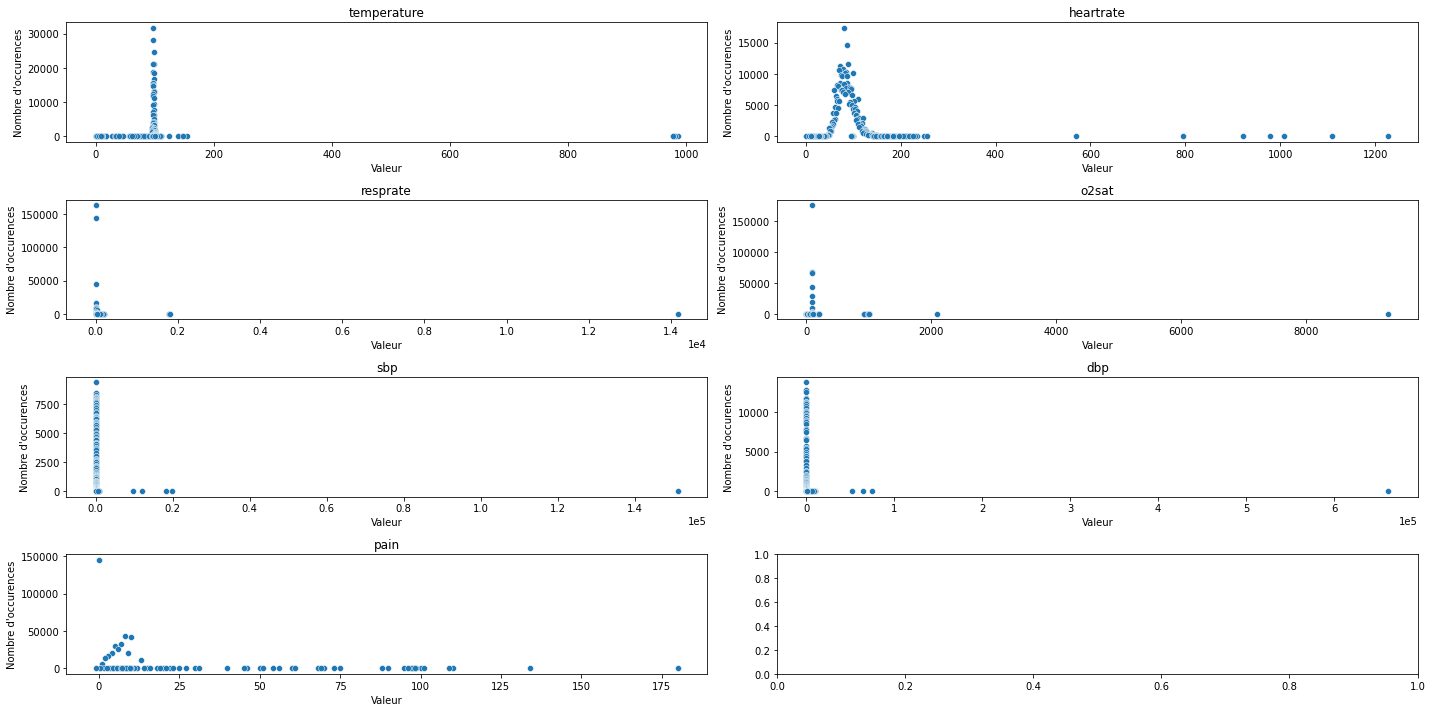

In [164]:
variables = ["temperature", "heartrate", "resprate", "o2sat", "sbp", "dbp", "pain"]
plot_all_scatter(X_train, variables, ncols=2)

De facon évidente, des **outliers** sont présents dans le dataset. 

Une temperature au dela de 150°F, un rythme cardiaque au dela de 400 bpm, une saturation en oxygène au dela de 100%, ou une douleur coté au-dessus de 10 sur une echelle de 0 à 10, correspondent à des données abberantes. 

A l'aide de la visualisation des données, de la documentation de MIMIC, et de connaissances métier, nous definissons des intervalles pour ces variables et supprimons les outliers

In [165]:
variables_ranges = {
    "temperature":[60,130],
    "heartrate":[20, 300],
    "resprate":[5, 50],
    "o2sat":[20, 100],
    "sbp":[40, 250],
    "dbp":[20, 200],
    "pain":[0,10]
}

X_train_clean, outliers = remove_outliers(X_train, variables_ranges)
outliers.round(2)

n   total  pourcentage
temperature    515  414671         0.12
heartrate       30  421179         0.01
resprate        78  417837         0.02
o2sat          137  417552         0.03
sbp            269  419888         0.06
dbp            626  419060         0.15
pain         11614  409525         2.84

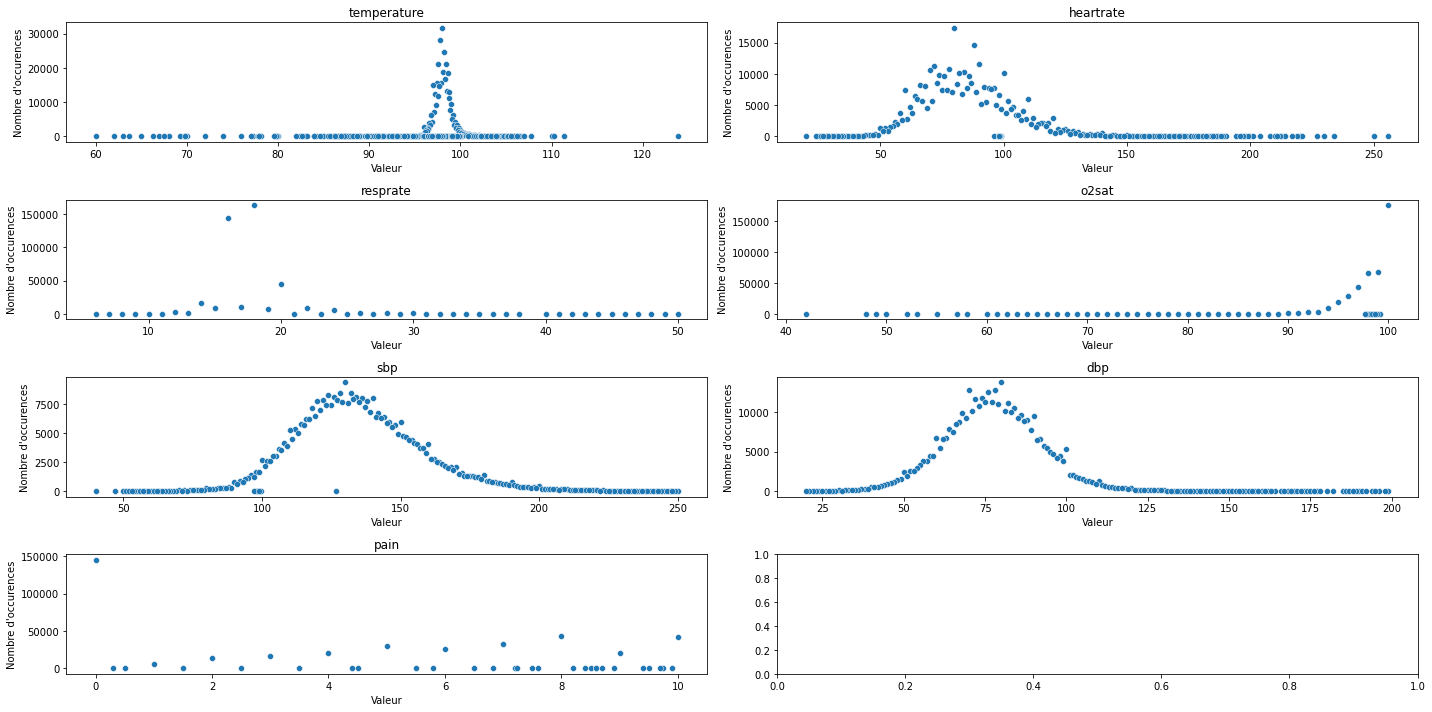

In [166]:
plot_all_scatter(X_train_clean, variables, ncols=2)

La **distribution des variables après suppression des outliers.**

On observe une **distribution normale** des variables comme la fréquence cardiaque, la pression arterielle ou la température

## III.2. Analyse des valeurs manquantes

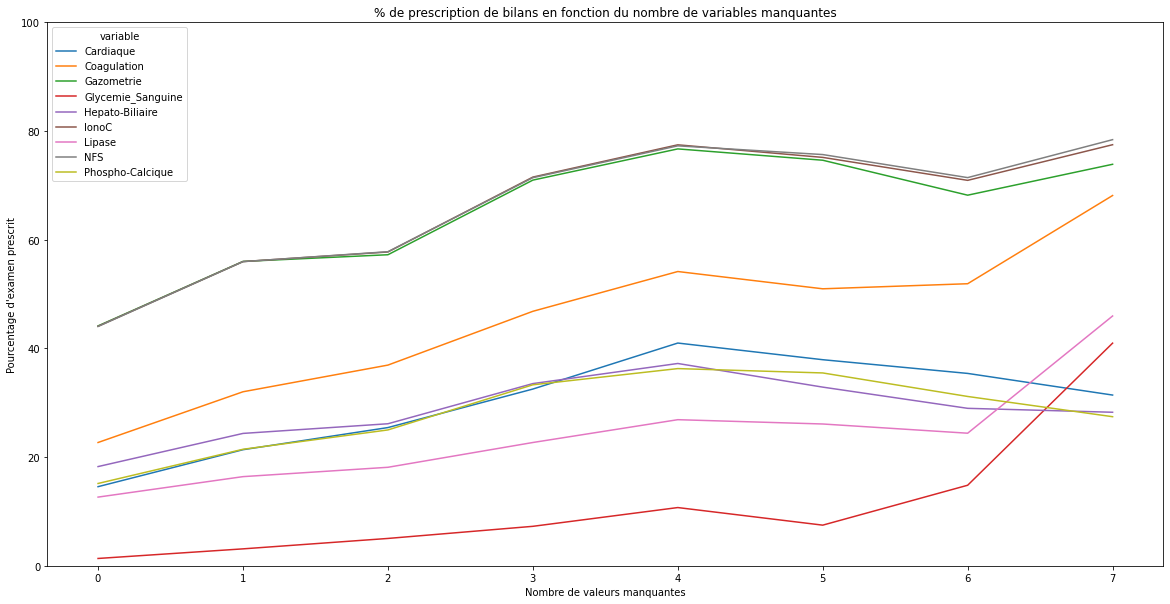

In [186]:
categorical_features = ['gender', "last_7", "last_30"]
continuous_features = ['age', 'temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp', 'pain']
features = categorical_features+continuous_features
labels = y_train.columns.values[1:].tolist()

plot_missing_outcome(X_train_clean, y_train, features, labels)

Nous observons que le taux de prises de sang prescrites augmente avec le nombre de valeurs manquantes.
En effet, plus le nombre de features est manquant, plus les patients ont eu une prise de sang.
La variable *donnée manquante* n'est donc pas indépendante de la target variable à prédire. 

Nous avons observé, en regardant de plus près les motifs de consultation des patients avec beaucoup de données manquantes, qu'il s'agissait en réalité, des **patients les plus graves**.   
Il s'agissait typiquement de traumatismes sévères, d'urgences neuro-chirurgicales, d'arrêts cardiaques, ou d'états de choc, ayant conduits les patients **directement en service d'accueil des urgences vitales (le déchocage), sans passer par le triage et l'infirmier d'accueil.**. Cela peut se faire quand le camion du SAMU transfert directement ces patients en salle de déchocage. La prise en charge (et donc la mesure de leurs constantes vitales) a donc été réalisé directement en shuntant le parcours classique, compte tenu de la gravité de leur état médical.  
Il pouvait aussi s'agir de patients moins graves mais particulièrement **agités**, ou dont l'état rend la prise en charge à l'IAO complexe et nécéssite donc directement l'examen par un médecin, ou l'administration d'un traitement initial (sédation par exemple).

**Au total,**

- **le nombre de features manquants est directement associé à la variable d'intêret (target)**

- **le nombre de features manquants est un surrogate de l'état et de la gravité des patients.**

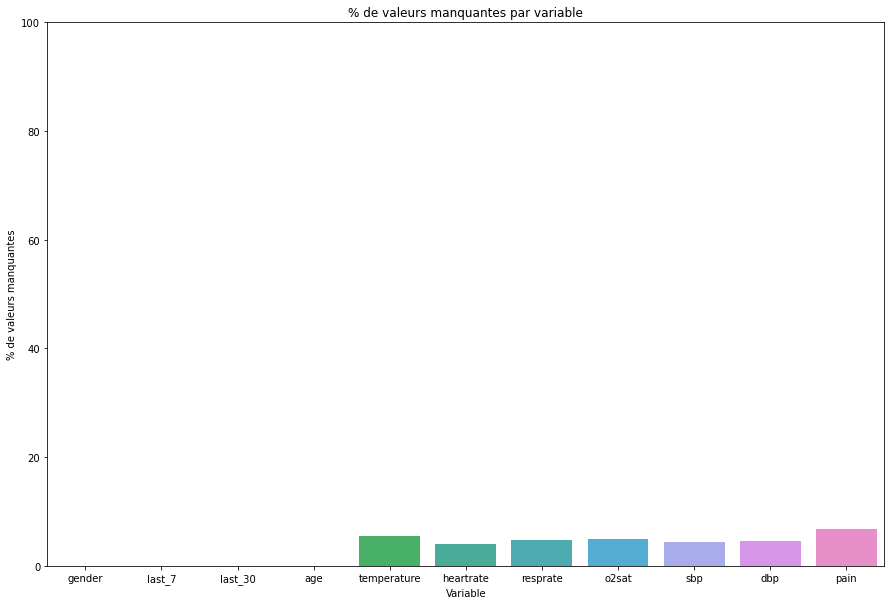

In [184]:
plot_missing_bar(X, features)

**Le pourcentage de données manquantes concernant les features ne dépasse pas 5% pour chaque variable** (à l'exception de la variable "pain" qui atteint 7 %). 

# III.3. Visualisation des corrélations

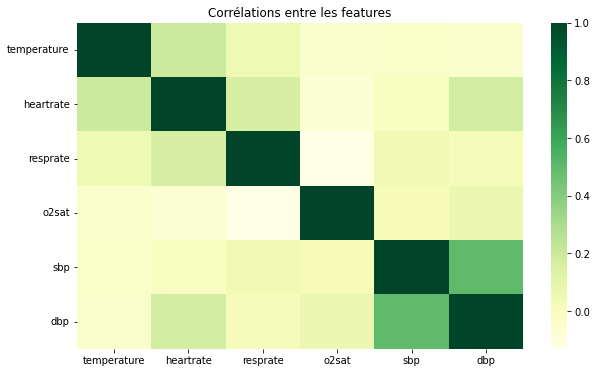

In [12]:
features_for_corr = ['temperature', 'heartrate','resprate','o2sat', 'sbp','dbp']
plot_correlation(X_train_clean, features_for_corr)

On observe **quelques corrélations caractéristiques** et attendues entre certaines variables:
- Entre la pression arterielle systolique et diastolique
- Entre la température et le rythme cardiaque (une fièvre engendre physiologiquement une tachycardie)
- Entre le rythme cardiaque et le rythme respiratoire (un état de choc, un exercice physique ou une attaque de panique peuvent accélerer le rythme cardiaque et le rythme respiratoire de facon conjointe)

Cependant, on note **de manière générale une corrélation plutôt faible dans la globalité des variables prédictives entre elles.**

# III. 4. Analyse du texte

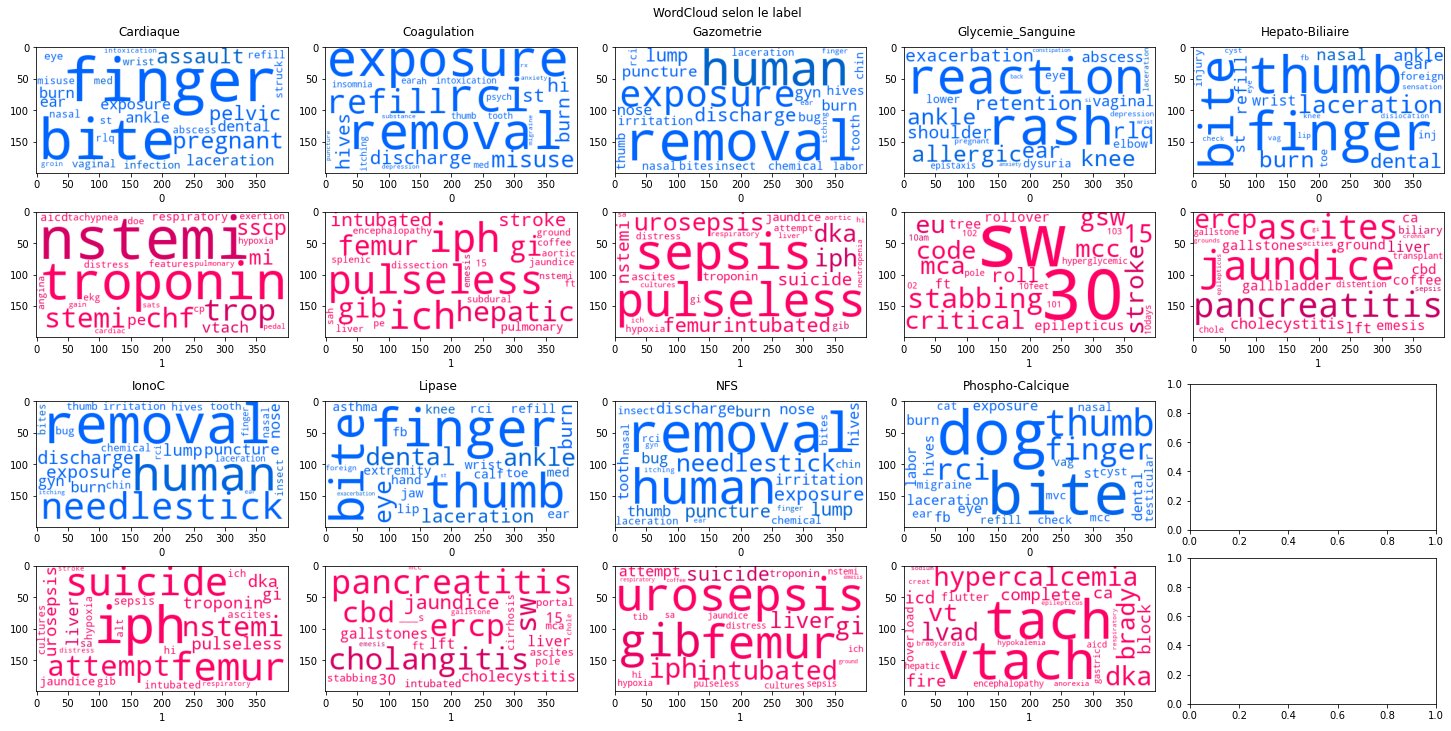

In [13]:
plot_odd_word_wc(X, y, "chiefcomplaint", labels, min_occurrence=3, ncols=5)

Ici nous représentons les **motifs de consultations** les plus associé à la prescription où non d'un type d'examen biologique. Cette mesure de force d'associé est effectué par le calcul d'un rapport de côte. Les termes présentant ayant un rapport de côte le plus élevé sont affichés dans chaque groupe.

Ainsi on observe la capacité éventuelle de la variable "motif de consultation" à discriminer les patients ayant recu une prise de sang et son type.

Par exemple, on observe que les motifs de consultations prédominants chez les patients ayant bénéficié d'un bilan hépatique sont la présence d'ascite, d'un ictère (jaunisse), d'une pancréatite, d'une colique hépatique, d'une cholecystite, de vomissements. Ces motifs ne sont pas présents de facon prédominante chez les patients n'ayant pas recu de bilan sanguin.

# III. 5. Exploration des labels

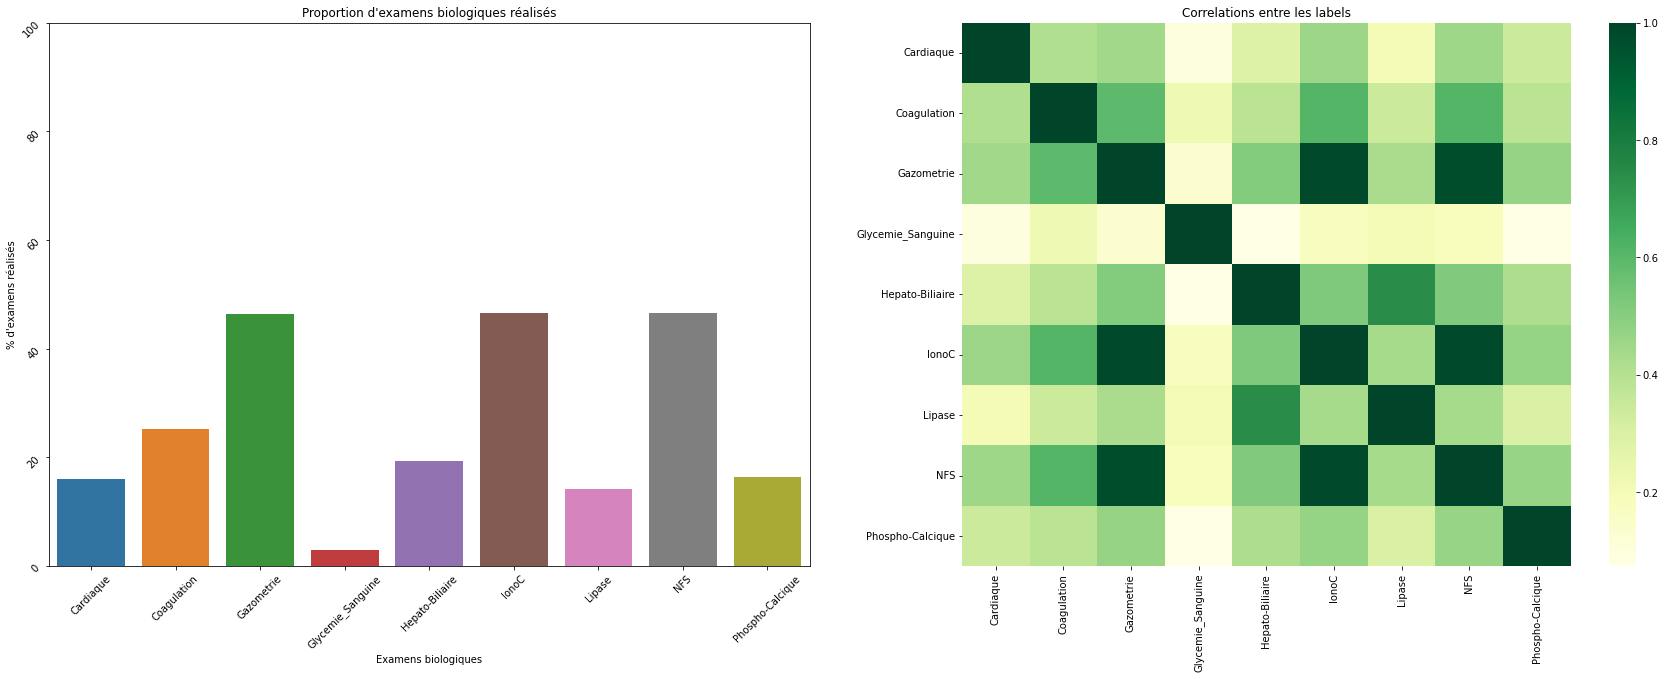

In [14]:
labels = y_train.columns.values[1:].tolist()
plot_labels_frequencies_and_correlation(y, labels)

Concernant la **fréquence de réalisation de chaque examen biologique.**, environ 50% patients ont bénéficié d'au moins un des examens parmi NFS, ionogramme sanguin, gaz du sang tandis que les autres examens biologiques étaient réalisés chez à peu près 20%.

On observe une **corrélation importante entre les 3 variables (labels)** les plus fréquentes, traduisant un co-occurence de leur réalisation aux urgences, à savoir NFS, ionogramme sanguin et gaz du sang. Il existe également une **corrélation importante entre ces 3 variables et le reste des examens biologiques.**  

Autrement dit, quand une prise de sang est réalisée, dans la grande majorité des cas, celle-ci comprend en général **au moins une NFS, un ionogramme et un gaz du sang** (ces 3 examens se comportent presque comme un cluster) **plus ou moins** d'autres modalités d'examens biologiques.

# III. 6. Association entre les features et labels

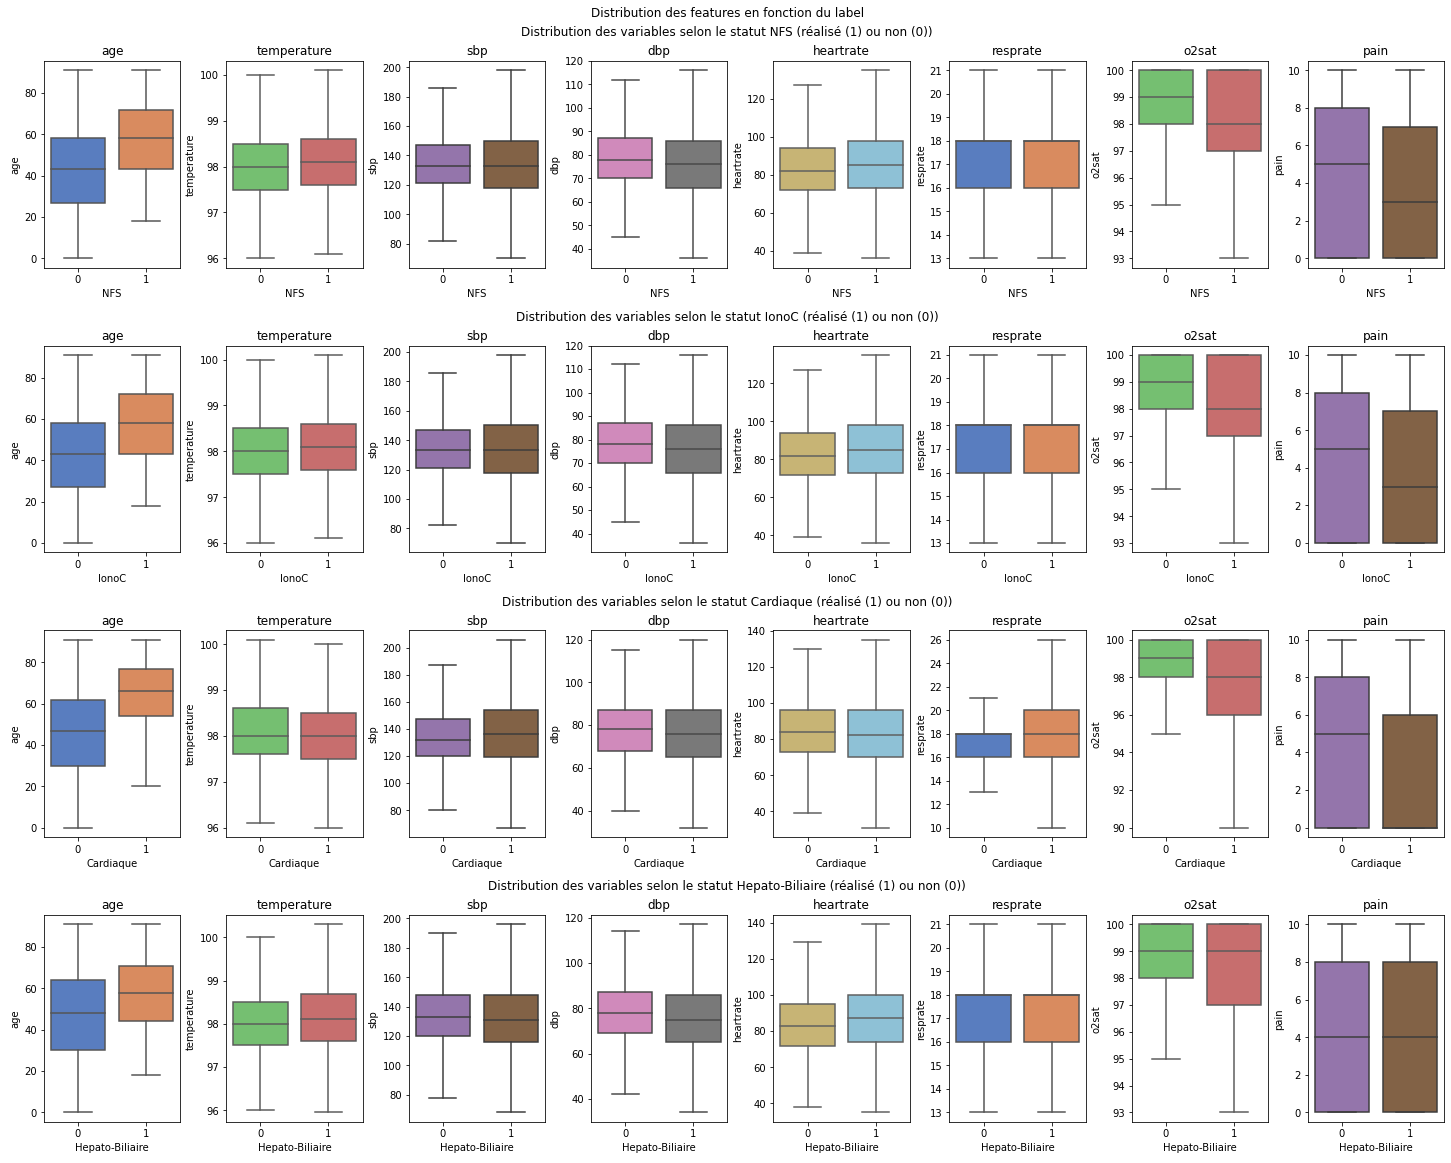

In [15]:
features = ["age", "temperature", "sbp", "dbp", "heartrate", "resprate", "o2sat", "pain"]
labels = ["NFS", "IonoC", "Cardiaque", "Hepato-Biliaire"]
plot_box_variable_label_distribution(X_train_clean, y_train, features, labels)

Pour 4 labels (NFS, ionogramme, biomarqueurs cardiaques et bilan hépatique), nous visualisons les **valeurs médianes des différents features selon que l'examen biologique ait été réalisé ou non.**

On observe de facon générale, un âge, une température, et un rythme cardiaque plus élevés et une saturation en oxygène plus basse chez les patients avec bilan sanguin, en comparaison au patients non prélevés. 

On observe de facon générale **un faible pouvoir discriminant** de ces critères pris isolément pour distinguer les patients ayant bénéficié d'une prise de sang des autres.

# IV. Sélection des variables d'interêts

In [605]:
from bop_scripts.models import generate_model, get_features_selection
from bop_scripts.visualisation import vizualize_features_selection
from sklearn.linear_model import LogisticRegression

_, X_train_clean_subset, _, y_train_subset = train_test_split(
    X_train_clean, y_train, test_size=500, random_state=42

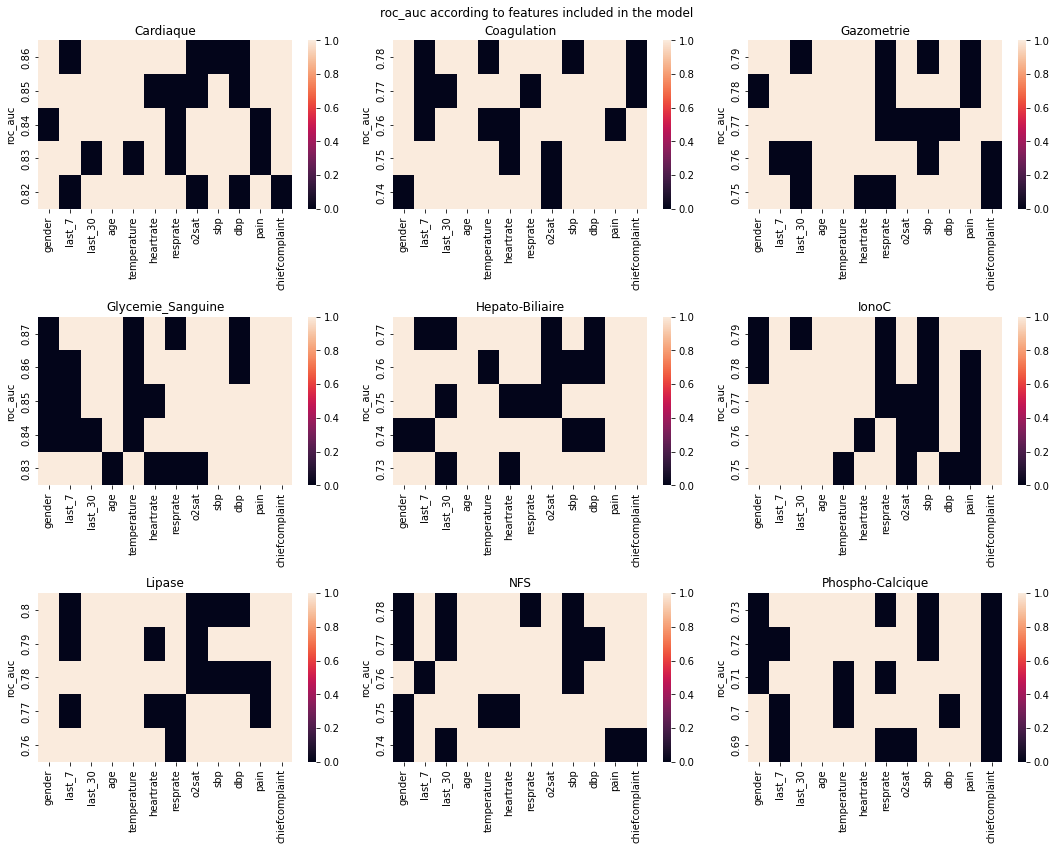

In [606]:
qualitatives_variables = ["gender", "last_7", "last_30"]
quantitatives_variables = ['age', 'temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp', 'pain']
text_variables = ["chiefcomplaint"]

scores = get_features_selection(X_train_clean_subset, y_train_subset.iloc[:,1:], 
                                LogisticRegression(class_weight="balanced", C=1, solver="liblinear", max_iter=50),
                                qualitatives_variables, quantitatives_variables, text_variables[0], min_features=8)
vizualize_features_selection(scores, "roc_auc", n_score_max=5)

Afin d'évaluer les combinaisons idéales de variables, nous avons entrainé et mesuré les performances de l'ensemble des modèles contenant entre 7 et 11 variables pour l'ensemble des labels.
Les performances ont été arrondis à la deuxième décimale.  
Lorsque deux modèles présentaient les mêmes performances, le modèle contenant le moins de variables était retenu.

L'enjeu est d'évaluer :
- Si des modèles plus petits performent aussi bien que de grand modèles
- Si certaines variables n'apportaient aucun gain de performance de manière systématique

Le texte a été traité à l'aide d'un **CountVectorizer** et l'ensemble des modèles ont étés entrainés à l'aide d'une régression logistique. L'algorithme d'optimisation utilisé a été **liblinear** qui convergeait plus rapidement dans le cadre de notre problème où un conditionnement par normalisation des variables a été effectué.

On observe une certaine hétérogénéité des variables conduisant à l'obtention d'un meilleur modèle selon le label à prédire.  

**Aucune variable ne s'est montrée systématiquement inutile**. 

A l'opposé, on identifie un fort poids des variables suivantes au sein des meilleurs modèles:
- **Age**
- Avoir consulté dans les 7 ou 30 derniers jours (**last_7** ou **last_30**) 
- Motif de consultation (**chiefcomplaint**) 

Chose notable, certains modèles semblent bénéficier de l'association de **last_7** et de **last_30**.  

Il faut toutefois noter que les modèles proposés présentent de **faibles variations**, ces dernières pouvant être lié à des **fluctuactions d'échantillonage lors de la cross-validation**.

# V. Définition et entrainement d'une solution d'apprentissage statistique

A partir des explorations précédents, nous proposons d'inclure l'ensemble des variables dans le modèle final.  
Nous entrainerons **un modèle par label à prédire** plutôt qu'un modèle multi-label.

**Nous inclurons l'ensemble des variables explorées**, c'est à dire :
- genre
- last_7
- last_30
- age
- temperature
- heartrate
- resprate
- o2sat
- sbp
- dbp
- pain
- chiefcomplaint

Ce choix est motivé de la façon suivante :
- Notre exploration des variables d'intérêt ne rend pas compte de potentielles relation complexes entre les features.
- Aucunes des variables analysées n'ont montrées l'absence total d'intérêt au sein des différents modèles.
- Il existe un rationel métier / physiologique en faveur de l'intérêt de ces variables.

Nous nous proposons d'explorer deux modèles :
- Une classification à l'aide d'une **régression logistique**, entrainé à l'aide d'un algorithme stochastique (SAG, SAGA) afin d'éviter d'effectuer le calcul de gradient sur l'ensemble du jeu de données (contenant plus de 500 000 éléments)
- Une classification à l'aide d'un réseau de neurones : **Multi Layer Percreptron (MLP)**. Le réseau sera entrainé sur un maximum de 50 epochs, nous procéderons à un arrêt précoce de l'entrainement par cross-validation du F1-score sur un jeu de validation indépendant.

La validation est effectué sur un jeu de données de validation de 10 000 éléments.
Nous avons considéré qu'il n'était pas nécessaire de procéder à une validation par cross-validation répété, dans la mesure où nous avons observés une forte reproductibilité de nos résultats durant nos différents entrainements et surtout du fait de la grande taille des échantillons d'entrainement (plus de 500 000 éléments) et de validation (10 000).

In [148]:
from bop_scripts.models import generate_model, fit_all_classifiers
from bop_scripts.visualisation import display_model_performances

qualitatives_variables = ["gender", "last_7", "last_30"]
quantitatives_variables = ['age', 'temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp', 'pain']
text_variables = ["chiefcomplaint"]
labels = y_train.columns[1:]

## V. 1. Régression logistique

In [137]:
from sklearn.linear_model import LogisticRegression

def lr_classifier_fn ():
    lr_classifier = generate_model(
        LogisticRegression(class_weight="balanced", solver="saga"),
        qualitatives_variables,
        quantitatives_variables,
        text_variables[0],
        remove_outliers=True,
        outliers_variables_ranges=variables_ranges,
        CountVectorizer_kwargs={"ngram_range":(1,1), "max_features":600}
    )

    return lr_classifier

lr_classifiers = fit_all_classifiers(
    lr_classifier_fn,
    X_train,
    y_train.iloc[:,1:],
    hide_warnings=True
)

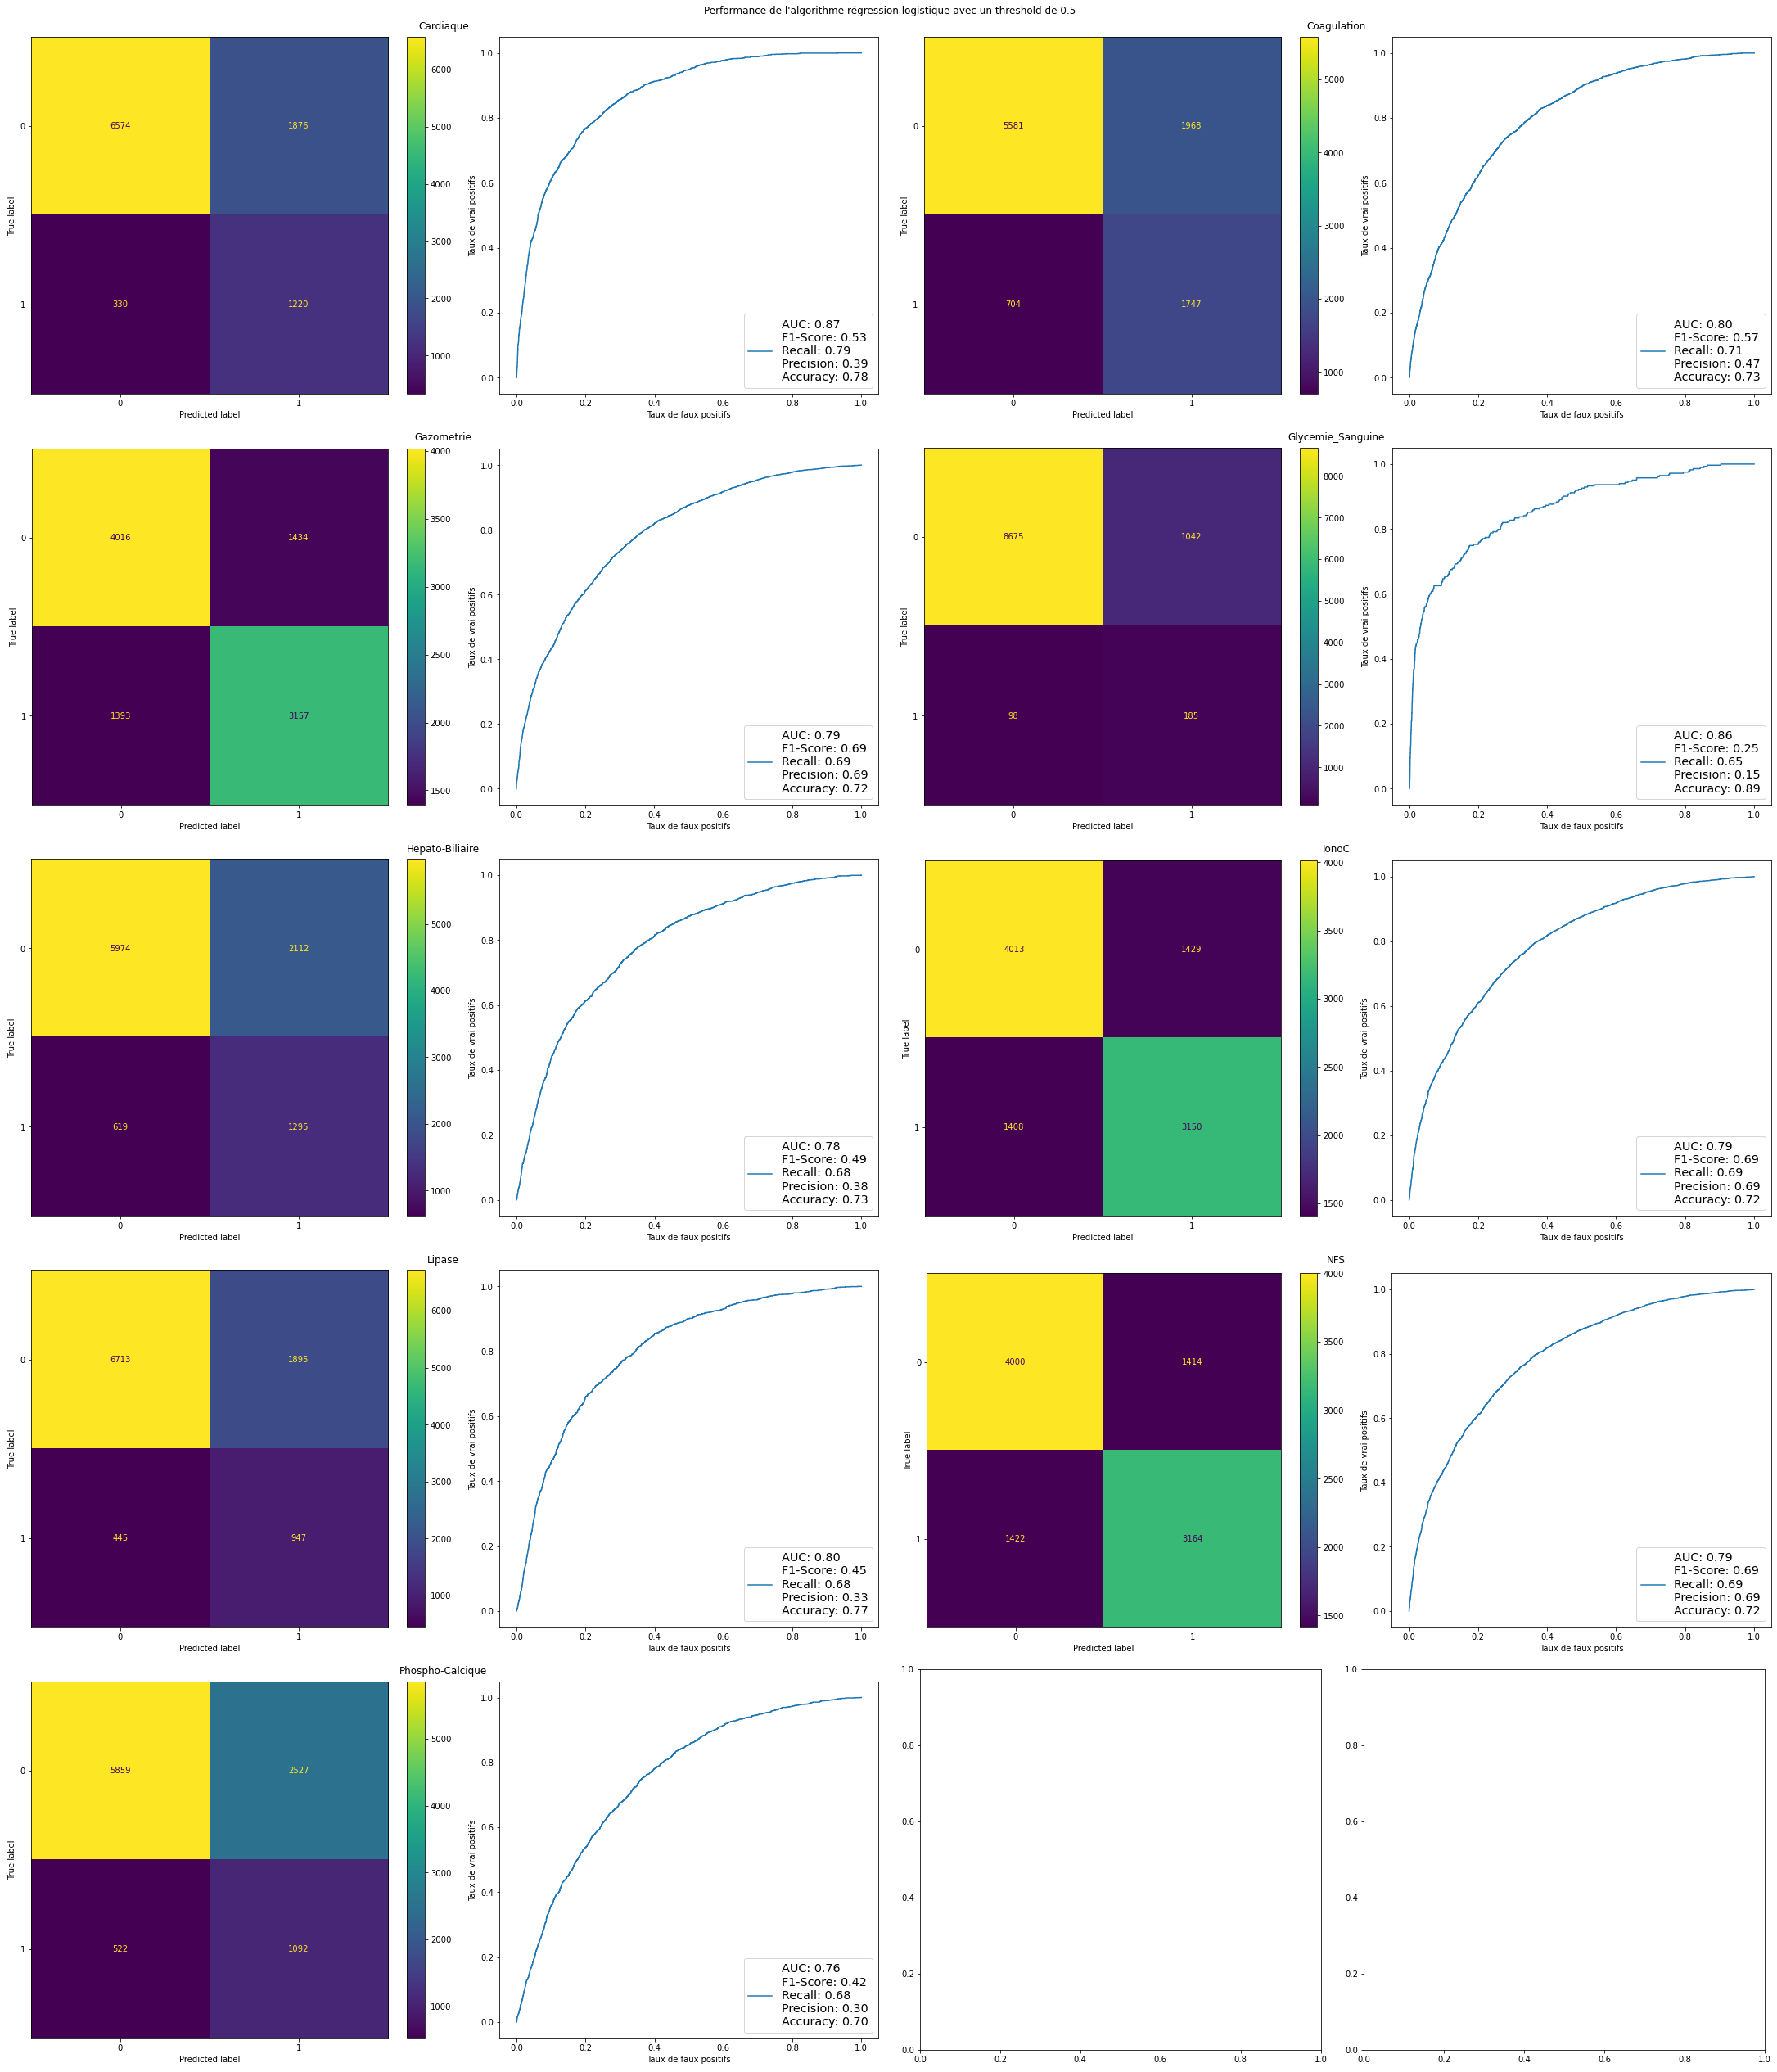

In [149]:
display_model_performances(lr_classifiers, X_test, y_test[labels], threshold=0.5, algorithm_name="régression logistique", ncols=2)

## V. 2. Réseau de neurone (MLP)

In [124]:
from bop_scripts.nn_models import torchMLPClassifier_sklearn, torchMLP
import torch

device = "cuda:0" if torch.cuda.is_available() else "cpu"
def torch_classifier_fn ():

    torch_classifier = torchMLPClassifier_sklearn(
        torchMLP,
        early_stop_validations_size=10000,
        early_stop=True,
        early_stop_metric="f1",
        early_stop_tol=1,
        n_epochs=50,
        device_train= device,
        device_predict="cpu",
        class_weight="balanced",
        learning_rate=1e-4,
        verbose=False
    )

    torch_sklearn_classifier = generate_model(
            torch_classifier,
            qualitatives_variables,
            quantitatives_variables,
            text_variables[0],
            remove_outliers=True,
            outliers_variables_ranges=variables_ranges,
            CountVectorizer_kwargs={"ngram_range":(1,1), "max_features":600}
    )

    return torch_sklearn_classifier

torch_sklearn_classifiers = fit_all_classifiers(
    torch_classifier_fn,
    X_train,
    y_train.iloc[:,1:],
    verbose=False
)

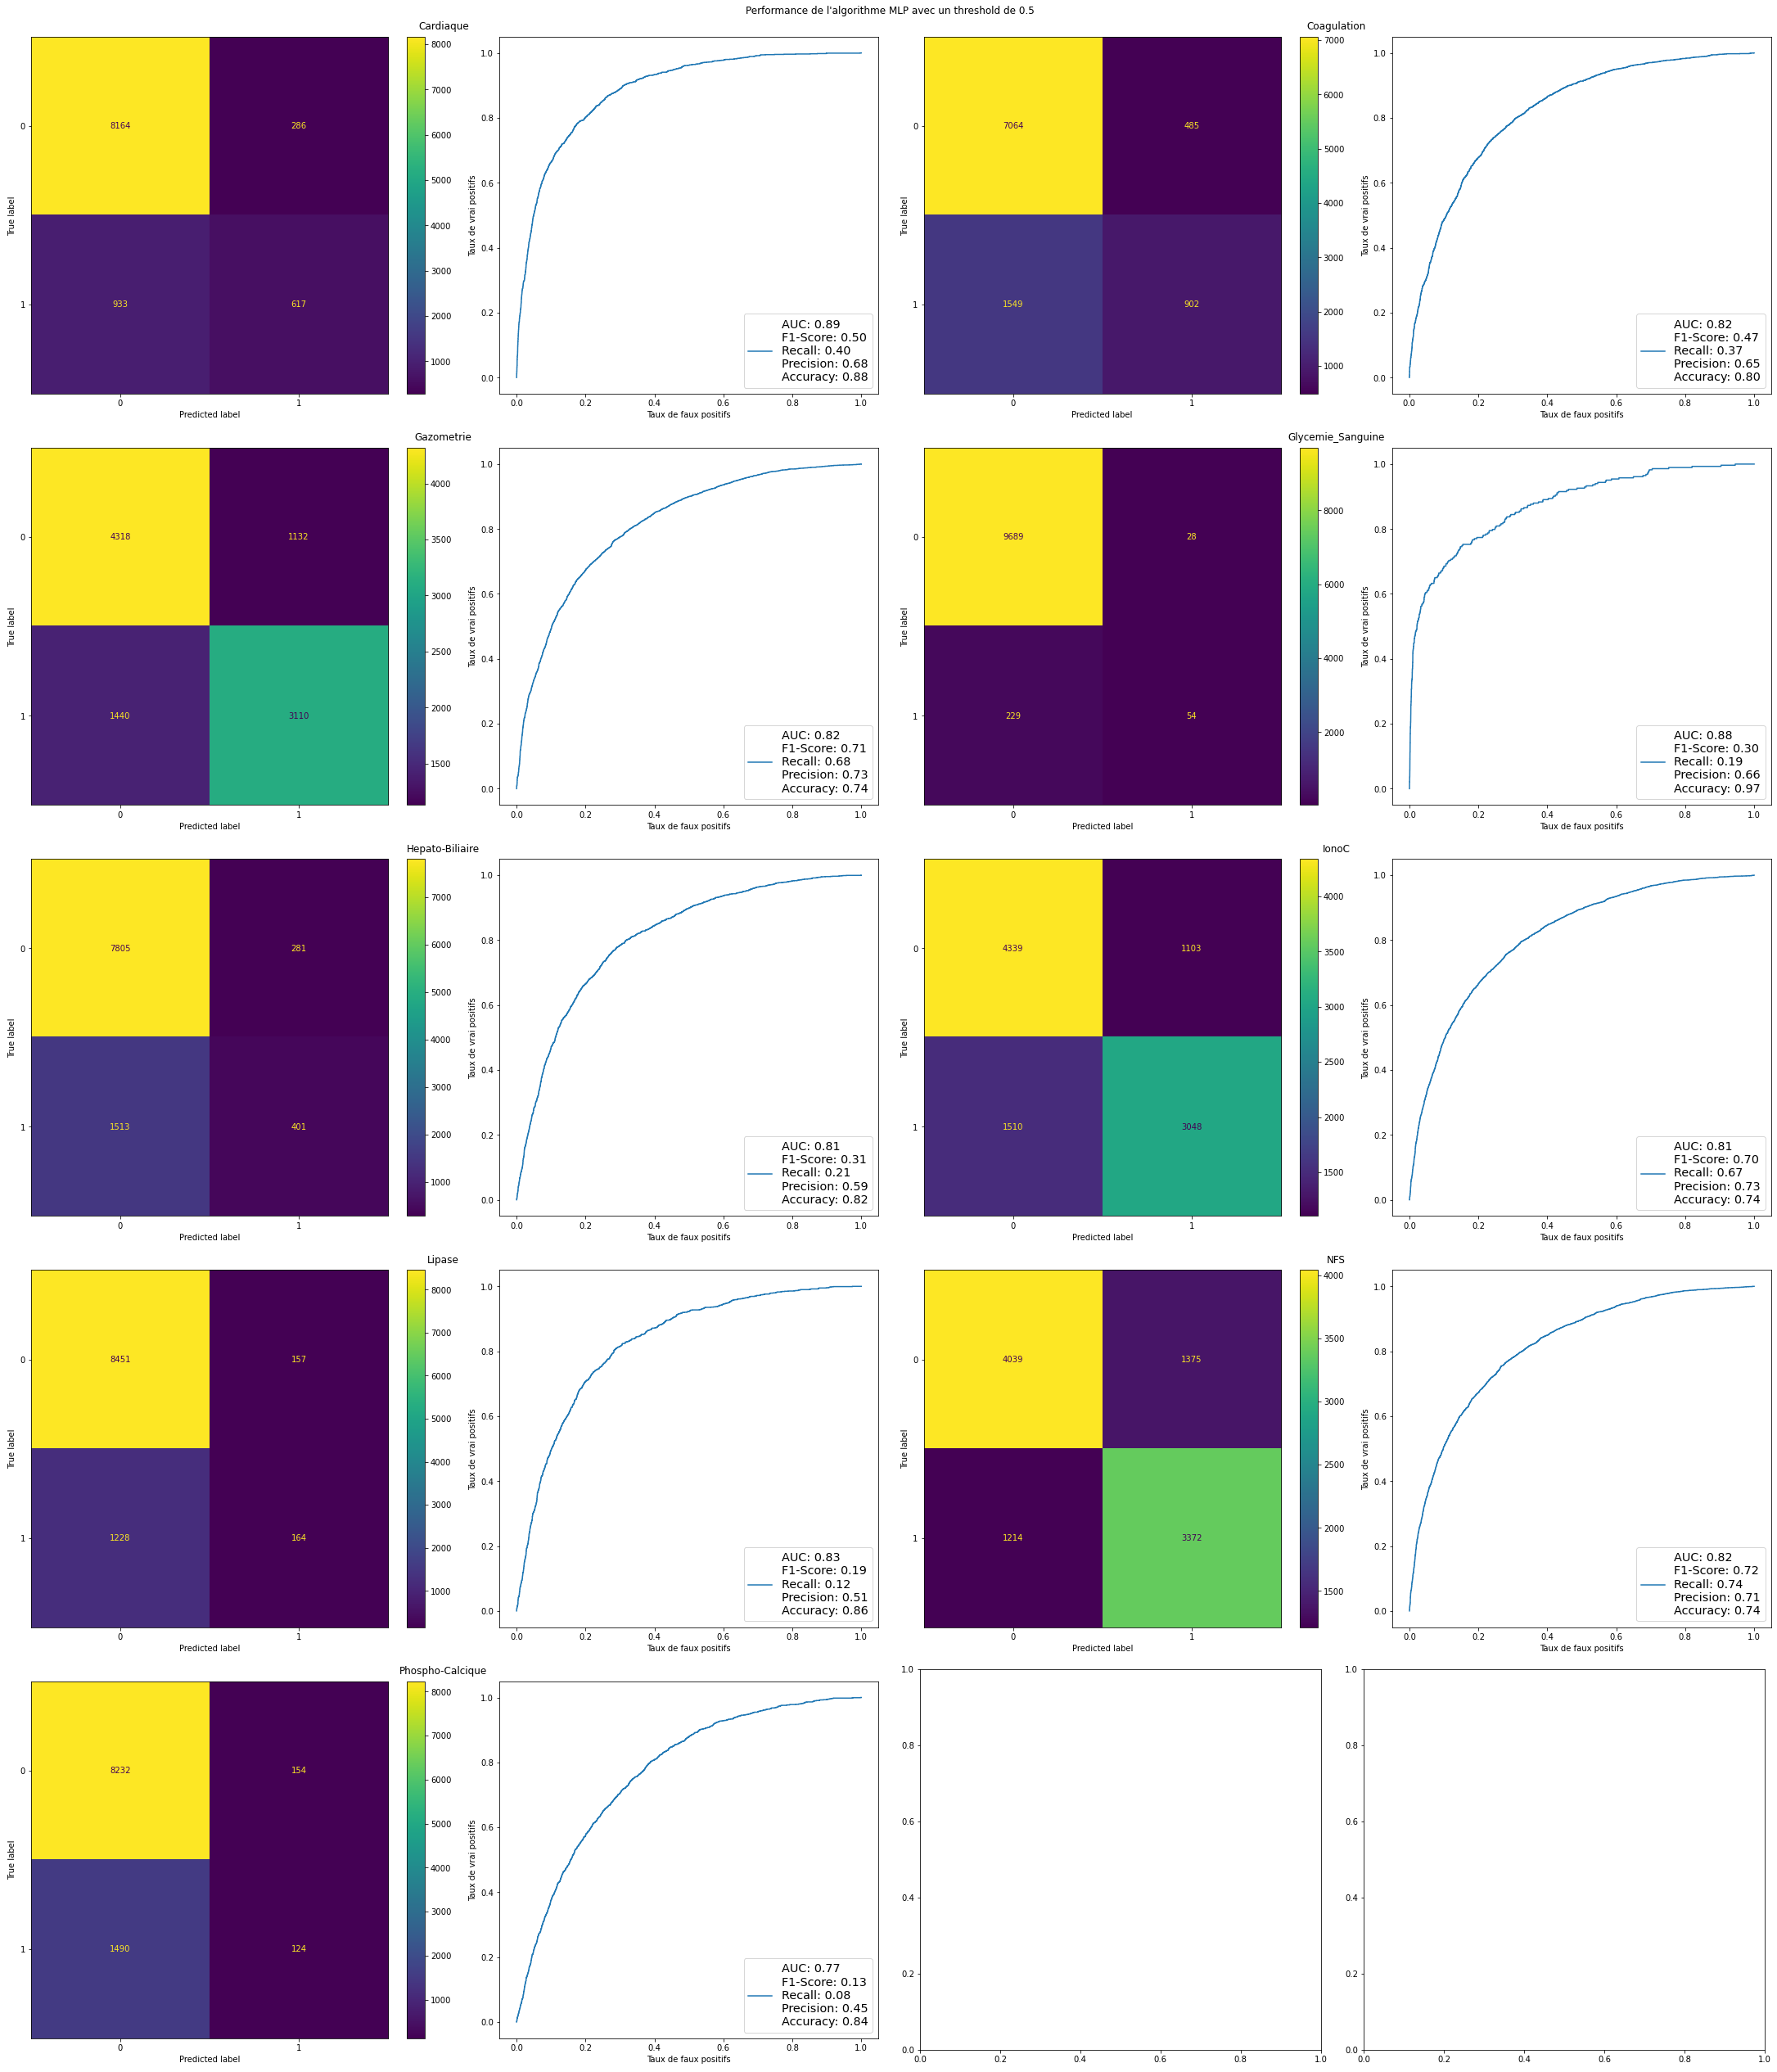

In [150]:
display_model_performances(torch_sklearn_classifiers, X_test, y_test.iloc[:,1:], threshold=0.5, algorithm_name="MLP", ncols=2)

**Nous observons des performances légèrement meilleures avec un modèle base sur des réseau de neurones en comparaison à une régression logistique**. Ces différences restent tout de même assez modestes.  
Pour des raisons de concision et de lisibilité du rapport, nous avons pas fait état de l'ensemble de nos expérimentations, nous avons toutefois essayés plusieurs architectures de réseaux de neurones, des modifications d'optimiseur, des modifications des paramètres d'apprentissage et avons conservé les modèles les plus performants.  

Concernant les pistes d'amélioration, il semble nécessaire d'ajouter de nouvelles features afin d'obtenir des meilleurs performances. Ainsi, nous pourrions par exemple exploiter :
- Les informations textuelles de manière plus fines, par exemple à l'aide d'embeddings
- Exploiter les **antécédents connus**
- Exploiter les **traitements en cours**

A ce titre, nous avons effectués plusieurs expérimentations qui ne nous ont toutefois pas permis d'améliorer le modèle :
- Utilisation d'embeddings de type Fastext où embedding contextuel à l'aide des modèle BERT-base ou BioBert
- Représentation des antécédents sous forme d'embedding à l'aide du modèle d'embedding des codes de classification internationale des maladies (ICD-9 / ICD-10) issus du projet *icd-codex* : https://github.com/icd-codex/icd-codex
- Représentation des traitements en cours par leurs appartenance à une des grande classes selon la classification ATC (anatomique, thérapeutique et chimique)
- Conceptions d'embeddings d'ordonnance crée par l'entrainement d'un réseau de neurone à identifier la co-prescription de pairs de molécules, stratégie voulue comme analogue aux méthodes *CBOW* et *skip-gram*

Bien que l'ensemble de ces méthodes ne nous aient pas données de résultats satisfaisant, nous considérons que chacune demanderait un temps d'exploration plus approfondie avant d'en conclure en leurs inefficacité.

Nous attirons l'attention du lecteur sur quelques points nécessaire à l'interprétation des performances :
- La non prédiction d'un examen à prescrire (**Faux Négatif**) engendre essentiellement un coût d'opportunité, correspondant au temps qui aurait été gagné si l'examen aurait été correctement prédit. **Ce Faux Négatif n'a pas d'impact sur le fonctionnement habituel du service. Cela revient à "faire comme d'habitutde".**
- La prédiction à tord d'un examen à prescrire (**Faux Positif**) engendre de nombreux coûts :
  - Coût relatif à la gêne occasionné au patient par la réalisation de l'acte de prélèvement (geste invasif)
  - Une potentielle prolongation inutile de la durée du passage dans le service
  - Une augmentation de la charge de travail du personnel soignant ayant potentiellement pour conséquence un ralentissement des autres prises en charge
  - Coût financier

Ainsi, nous attendons que notre algorithme une diminution de taux de faux positifs, c'est à dire une maximisation de la précision. En statistique bio-médicale cette métrique se nomme la **Valeur Prédictive Positive (VPP)** dont le seuil d'acceptabilité resterait à définir.

Notre modèle présente des performances très limité dans la prédiction de la prescription d'examen **Phospho-calcique**, **Lipase**, **Hepato-Biliaire** et **Glycémie Sanguine**. La forme des courbes ROC de ces derniers laisse entrevoir une difficulté à trouver un compromis entre précision et recall. Nous pensons que cela s'expliquer par deux facteurs :
- La fréquence de réalisation de ces examens est plus faible que celle des autres examens (autours de 20%), constituant partiellement un problème d'entrainement sur échantillons déséquilibré. Il pourrait à ce titre être intéressant d'explorer une approche autours de la gestion de jeux de données déséquilibré (ré-équilibrage par suppression d'examples négatifs, augmentation de dataset par génération de données synthétiques (par exemple à l'aide de l'outils SMOTE))
- Les données actuelles n'encodent pas assez d'information pour discriminer un patient ayant où n'ayant pas besoin d'un de ces types d'examens.

Concernant la marqueur **Cardiaque** et la **coagulation** nous identifions de relatives bonnes performances qui restent à notre avis malgré tout en deça de performances acceptables pour une utilisation pratique de l'outils. 

Enfin, pour la **NFS**, le **Ionogramme complet** et la **Gazométrie**, qui sont les examens les plus couramment réalisés, nous disposons de performances correctes avec **la possibilité de maximiser la précision en sacrifiant du recall par ajustement du seuil de décision de la positivité de la prédiction.**
 
C'est ce que nous envisageons enfin ci-dessous

In [ ]:
display_model_performances(torch_sklearn_classifiers, X_test, y_test.iloc[:,1:], threshold=0.5, algorithm_name="MLP", ncols=2)

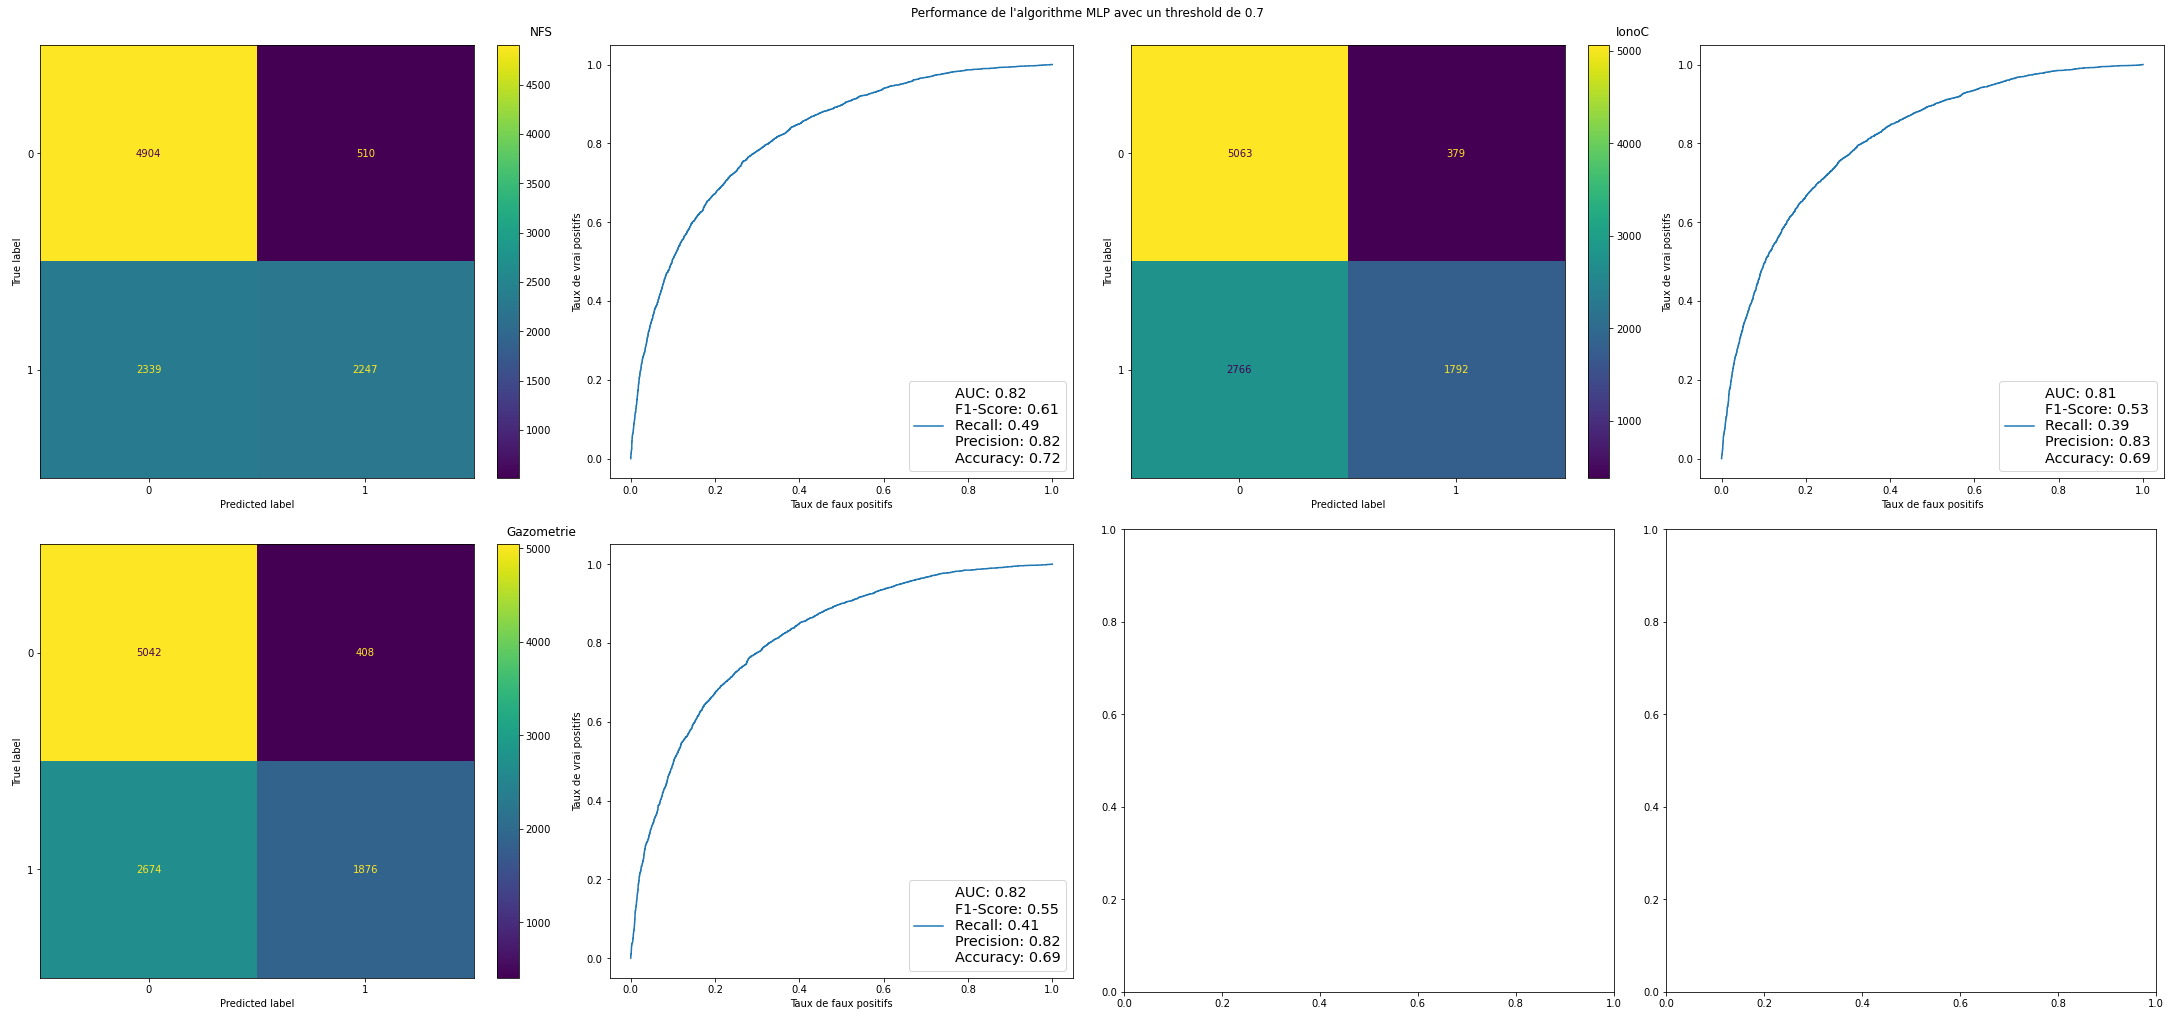

In [158]:
exams = ["NFS", "IonoC", "Gazometrie"]
exams_classifiers = dict([(x,y) for x, y in torch_sklearn_classifiers.items() if x in exams])
display_model_performances(exams_classifiers, X_test, y_test[exams], threshold=0.7, algorithm_name="MLP", ncols=2)

**Nous obtenons ainsi des précisions (métrique d'intêret comme expliqué plus haut) et des AUC dépassants 80% avec une minimisation des faux positifs, lesquels représentent moins de 5% du test set.**

Quelques remarques finales avant de conclure: 

A noter que le temps de réalisation d'un examen se décompose de la façon suivante :
- Temps technique de prélèvement
- Temps d'acheminement de l'examen au laboratoire
- Temps de traitement de la demande au laboratoire
- Temps de mesure au sein de l'automate

Ainsi, le temps de mesure au sein de l'automate ne correspond qu'à une petite partie du temps nécessaire à la réalisation d'un examen.  
Il est donc possible, lorsque l'échantillon sanguin est compatible, de faire réaliser **à posteriori** (en appelant le laboratoire par example qui se charge de processer à nouveau le même tube de sang déja acheminé) un où des examens complémentaires sur ce même prélèvement.  
**Ainsi, pour certains examens, la seule prédiction d'une modalité est suffisante pour maintenir la pertinence du système,** c'est notamment le cas pour : **IonoC**, **Cardiaque**, **Lipase**, **Hépato-biliaire** et **Phospho-calcique**, lesquels sont des examens pratiqués dans le même laboratoire de **biochimie**. 

Ce n'est toutefois pas le cas pour la **coagulation** (réalisé au laboratoire d'hémostase). 

Enfin l'examen glycémie sanguine peut quand à lui être substitué par des mesures capillaires se faisant extrêmement rapidement.


**En conclusion :**

- **Nous avons developpé un outil de prediction, basé sur un réseau de neurone, permettant, à partir de données simples, obtenues dans les premières minutes d'une consultation aux urgences, de prédire correctement la nécéssité de réaliser une NFS, un ionogramme complet et une gazométrie.**

- **Nous reconnaissons qu'une amélioration des performances prédictive est possible (en étudiant les performances de modèles intégrants les antécédents et traitements en cours des patients) et serait attendu en vue d'obtenir un système optimal avant d'envisager un déploiement.**